# <a href="https://miptstats.github.io/courses/python.html">Python для анализа данных</a>

## Библиотека `matplotlib`

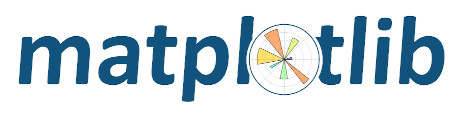

Есть несколько пакетов для построения графиков. Один из наиболее популярных — `matplotlib`. Если в `jupyter notebook` выполнить специальную магическую команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков — тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки
* `plt.scatter(x, y, params)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси;
* `plt.plot(x, y, params)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах;
* `plt.fill_between(x, y1, y2, params)` — закрасить пространство между $y_1$ и $y_2$ по координатам из $x$;
* `plt.pcolormesh(x1, x1, y, params)` — закрасить пространство в соответствии с интенсивностью $y$;
* `plt.contour(x1, x1, y, lines)` — нарисовать линии уровня. Затем нужно применить `plt.clabel`.


Вспомогательные функции
* `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$;
* `plt.show()` — показать график;
* `plt.subplot(...)` — добавить подграфик;
* `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси;
* `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси;
* `plt.title(name)` — установить имя графика;
* `plt.xlabel(name)` — установить название горизонтальной оси;
* `plt.ylabel(name)` — установить название вертикальной оси;
* `plt.legend(loc=...)` — сделать легенду в позиции loc;
* `plt.grid()` — добавить сетку на график;
* `plt.savefig(filename)` — сохранить график в файл.

http://matplotlib.org/gallery.html — тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой, например,

`plt.plot?`

### 1. Простые графики

In [2]:
import numpy as np
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

%matplotlib inline

Рисуем график с помощью списка $y$-координат; $x$-координаты образуют последовательность 0, 1, 2, ...

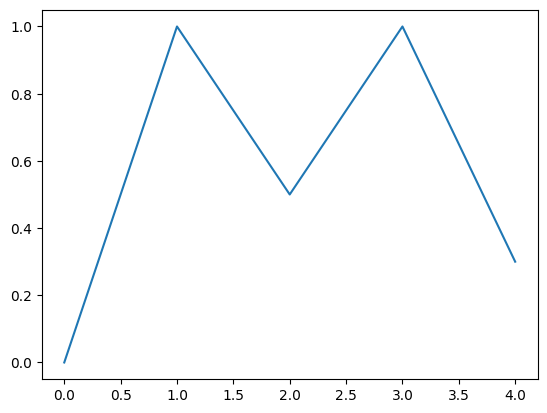

In [3]:
plt.figure()
plt.plot([0, 1, 0.5, 1, 0.3])
plt.show()

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

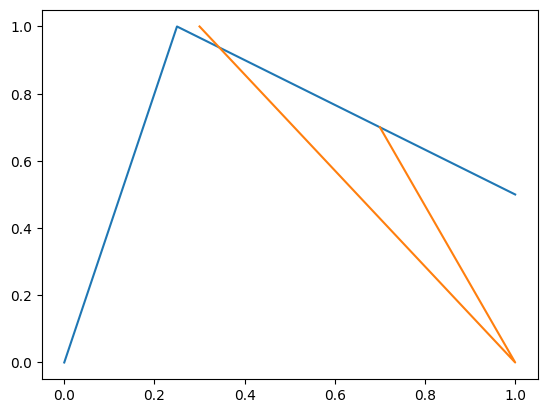

In [6]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5],[0.3, 1, 0.7],[1,0,0.7])
plt.show()

Функция `scatter` просто рисует точки, не соединяя их линиями.

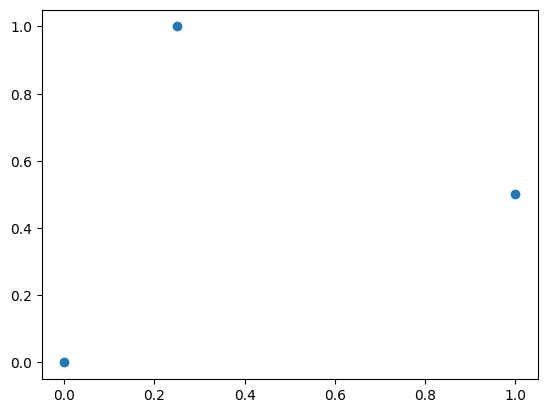

In [17]:
plt.figure()
plt.scatter([0, 0.25, 1], [0, 1, 0.5])
plt.show()

$x$-координаты не обязаны монотонно возрастать. Тут, например, мы строим замкнутый многоугольник.

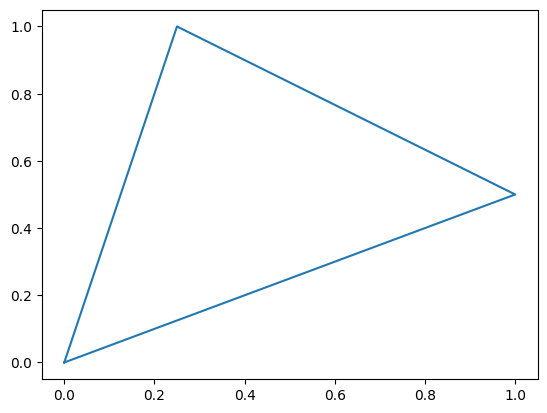

In [18]:
plt.figure()
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

In [7]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.

        The 

Когда точек много, ломаная неотличима от гладкой кривой.

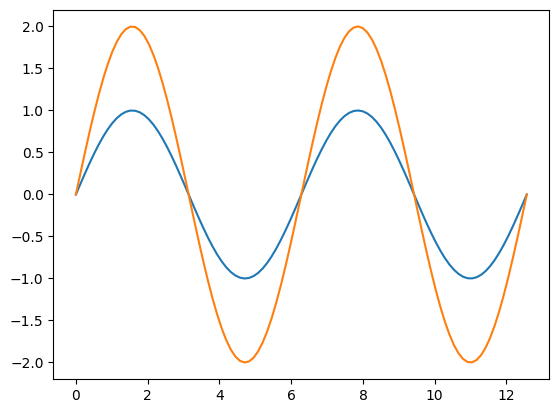

In [9]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), x, (2*np.sin(x)))
plt.show()

In [27]:
x = list(np.linspace(0, 4 * np.pi, 6))
print(x)

[np.float64(0.0), np.float64(2.5132741228718345), np.float64(5.026548245743669), np.float64(7.5398223686155035), np.float64(10.053096491487338), np.float64(12.566370614359172)]


Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

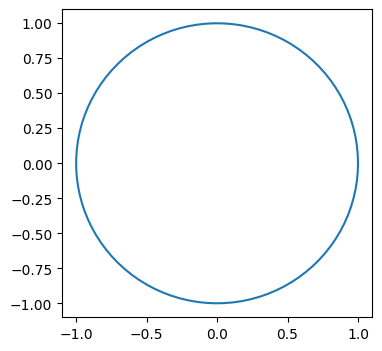

In [16]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(4,4))
plt.plot(np.cos(t), np.sin(t))
plt.show()

А вот одна из фигур Лиссажу.

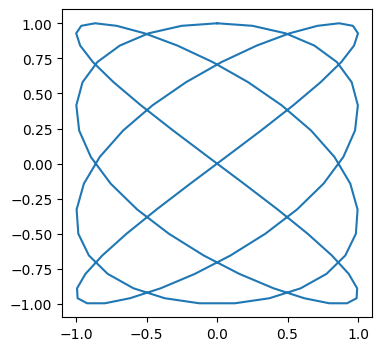

In [15]:
plt.figure(figsize=(4,4))
plt.plot(np.sin(4 * t), np.cos(3 * t))
plt.show()

Несколько кривых на одном графике. Каждая задаётся парой массивов — $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить. Вообще говоря, подобным кодом не стоит пользоваться.

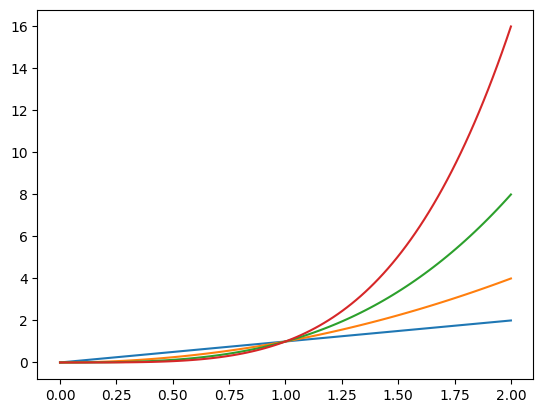

In [8]:
x = np.linspace(0, 2, 100)
plt.figure()
plt.plot(x, x, x, x**2, x, x**3, x, x**4)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` — красный, `'b'` — синий и т.д.), дальше задаётся тип линии (`'-'` — сплошная, `'--'` — пунктирная, `'-.'` — штрих-пунктирная и т.д.).

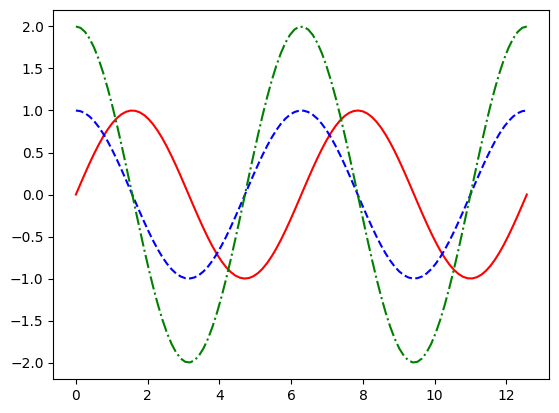

In [49]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'b--')
plt.plot(x, 2*np.cos(x), 'g-.')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

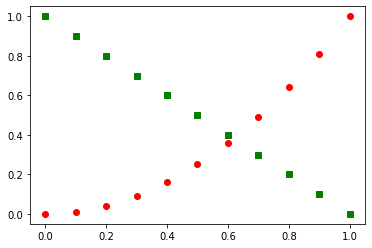

In [11]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

Вот пример настройки почти всего, что можно настроить. Можно задать последовательность засечек на оси $x$ (и $y$) и подписи к ним, в которых, как и в других текстах, можно использовать $\LaTeX$-овские обозначения. Задать подписи осей $x$ и $y$ и заголовок графика. Во всех текстовых элементах можно задать размер шрифта. Можно задать толщину линий и штрихи. В примере ниже на графике косинуса рисуется штрих длины 8, потом участок длины 4 не рисуется, потом участок длины 2 рисуется, потом участок длины 4 опять не рисуется, и так по циклу; поскольку толщина линии равна 2, эти короткие штрихи длины 2 фактически выглядят как точки. Можно задать подписи к кривым (legend); где разместить эти подписи тоже можно регулировать.

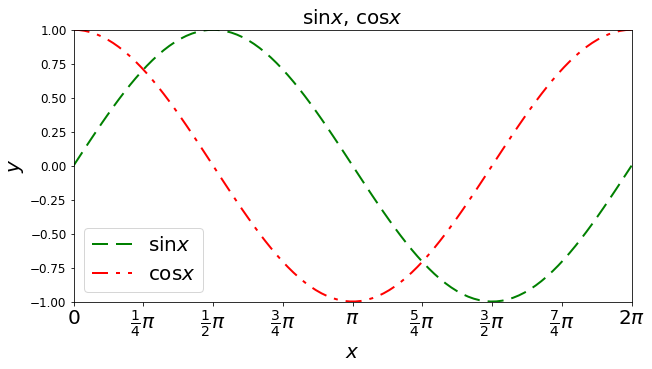

In [12]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x), linewidth=2, color='g', dashes=[8, 4], label=r'$\sin x$')
plt.plot(x, np.cos(x), linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'$\cos x$')
plt.axis([0, 2 * np.pi, -1, 1])
plt.xticks(np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
           ('0',r'$\frac{1}{4}\pi$',r'$\frac{1}{2}\pi$',  # Как подписать
            r'$\frac{3}{4}\pi$',r'$\pi$',r'$\frac{5}{4}\pi$',
            r'$\frac{3}{2}\pi$',r'$\frac{7}{4}\pi$',r'$2\pi$'),
           fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'$\sin x$, $\cos x$', fontsize=20)
plt.legend(fontsize=20, loc=0)
plt.show()

**Упражнение:** постройте пунктирный график функции $y = x^3$. Подпишите оси, заголовок и легенду. 

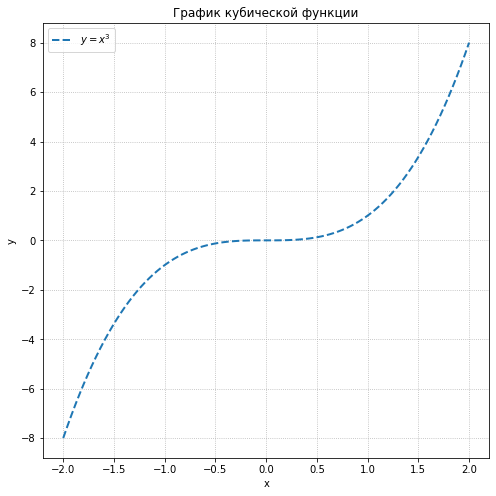

In [13]:
x = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.plot(x, x**3, linestyle='--', lw=2, label='$y=x^3$')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.title('График кубической функции')
plt.grid(ls=':')
plt.show()

**Упражнение:** постройте пунктирный график функции $y = x^3$. Подпишите оси, заголовок и легенду. 

In [2]:
# ваш код

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. В добавок к стандартным маркерам, можно определить самодельные.

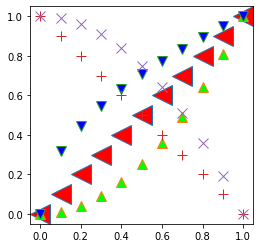

In [14]:
x = np.linspace(0, 1, 11)

plt.figure(figsize=(4, 4))
plt.plot(x, x, linestyle='', marker='<', markersize=20, markerfacecolor='#FF0000')
plt.plot(x, x ** 2, linestyle='', marker='^', markersize=10, markerfacecolor='#00FF00')
plt.plot(x, x ** (1/2), linestyle='', marker='v', markersize=10, markerfacecolor='#0000FF')
plt.plot(x, 1 - x, linestyle='', marker='+', markersize=10, markerfacecolor='#0F0F00')
plt.plot(x, 1 - x ** 2, linestyle='', marker='x', markersize=10, markerfacecolor='#0F000F')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.show()


Если $y$ меняется на много порядков, то удобно использовать логарифмический масштаб по $y$.

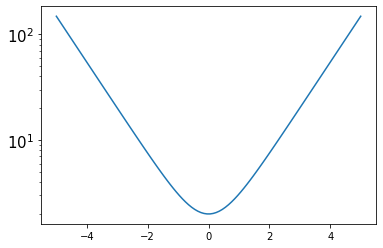

In [15]:
x = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обоим осям.

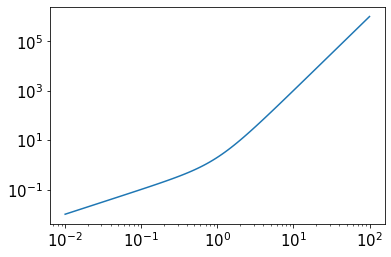

In [16]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

Очень часто, нам необходимо размещать несколько графиков рядом друг с другом. Это проще всего сделать используя `plt.subplots()`.

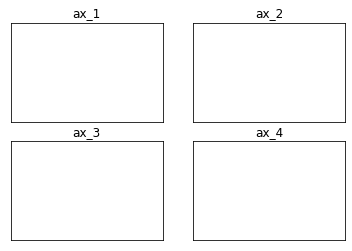

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

Конечно, такой способ размещения некоторого количества областей Axes на Figure довольно гибок, но на практике функция `plt.subplots(nrows, ncols)` оказывается гораздо удобнее:

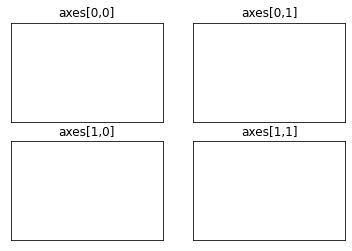

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
    
plt.show()

Для того, чтобы очистить поле рисунка, можно использовать функцию `plt.clf()`.

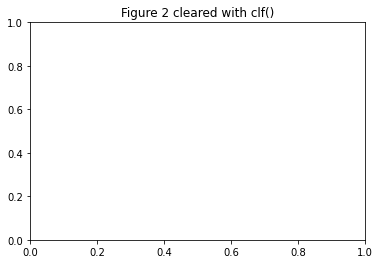

In [19]:
f2 = plt.figure()
plt.plot([1,2,3]) 

plt.clf()
plt.title("Figure 2 cleared with clf()")

plt.show()

### 2. Более сложные графики

#### 2.1. Полярные координаты

Первый массив — $\varphi$, второй — $r$. Вот спираль.

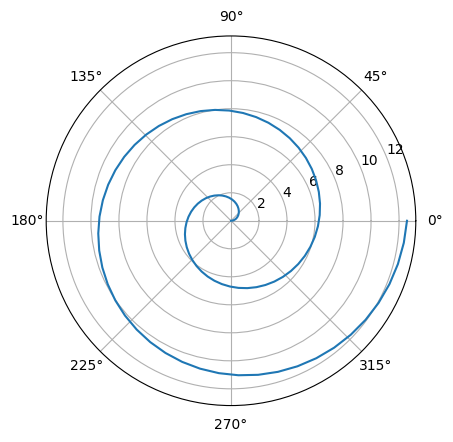

In [4]:
t = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.polar(t, t)
plt.show()

А это угловое распределение пионов в $e^+ e^-$ аннигиляции.

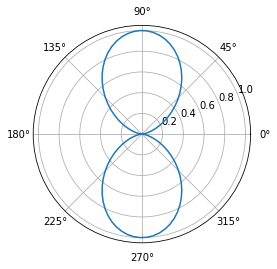

In [21]:
phi = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.polar(phi, np.sin(phi) ** 2)
plt.show()

#### 2.2. Контурные графики

Пусть мы хотим изучить поверхность $z=xy$. Вот её горизонтали.

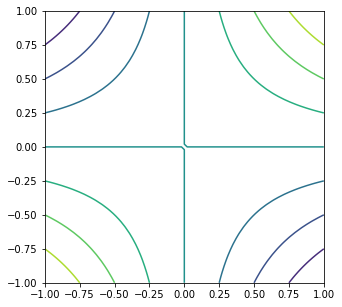

In [22]:
x = np.linspace(-1, 1, 50)
y = x
z = np.outer(x, y)

plt.figure(figsize=(5,5))
plt.contour(x, y, z)
plt.show()

Что-то их маловато. Сделаем побольше и подпишем.

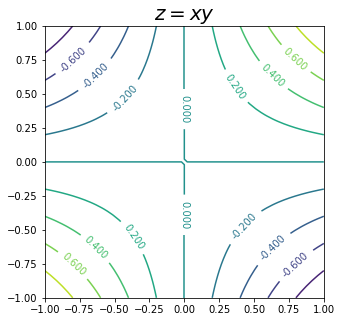

In [23]:
plt.figure(figsize=(5,5))
curves = plt.contour(x, y, z, np.linspace(-1, 1, 11))
plt.clabel(curves)
plt.title(r'$z=xy$', fontsize=20)
plt.show()

А здесь высота даётся цветом, как на физических географических картах. Функция `colorbar` показывает соответствие цветов и значений $z$.

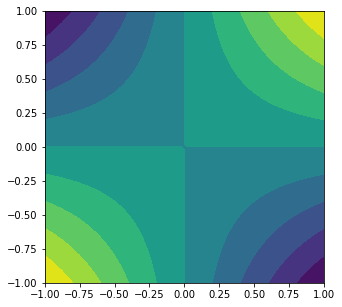

In [24]:
plt.figure(figsize=(5,5))
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
# plt.colorbar()
plt.show()

#### 2.3. Images (пиксельные картинки)

Картинка задаётся массивом `z`: `z[i,j]` — это цвет пикселя `i,j`, массив из 3 элементов (`rgb`, числа от 0 до 1).

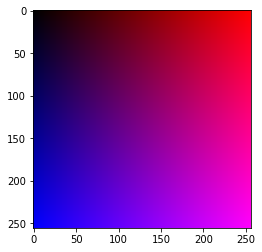

In [25]:
n = 256
u = np.linspace(0, 1, n)
x, y = np.meshgrid(u, u)
z = np.zeros((n, n, 3))
z[:, :, 0] = x
z[:, :, 2] = y

plt.figure()
plt.imshow(z)
plt.show()

Можно загрузить картинку из файла.
Это будет обычный `numpy.array`.
Размерность картинки $280 \times 280$.
По последней координате цвета RGB и прозрачность.

<class 'numpy.ndarray'> (2000, 2000, 4)


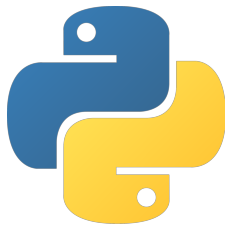

In [26]:
picture = plt.imread('python.png')
print(type(picture), picture.shape)

plt.imshow(picture)
plt.axis('off')
plt.show()

#### 2.4.  Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [5]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

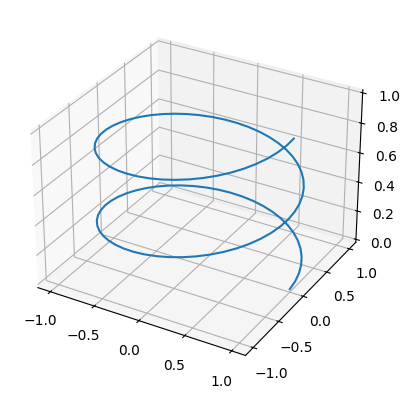

In [6]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
plt.show()

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой. Это можно делать с трёхмерными картинками в отдельных окнах. Но можно задать, с какой стороны мы смотрим.

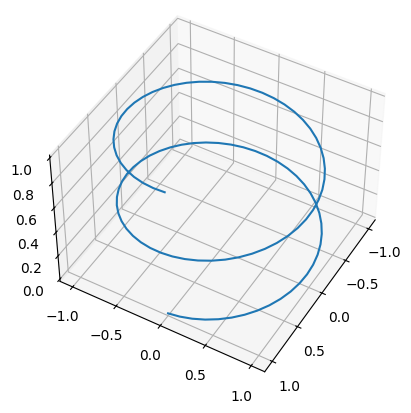

In [13]:
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.elev, ax.azim = 45, 30
ax.plot(x, y, z)
plt.show()

#### 2.5.  Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

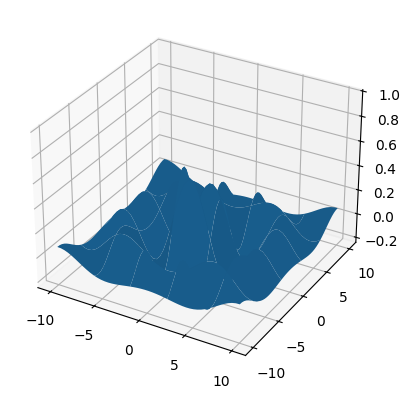

In [14]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, rstride=10, cstride=10)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

ValueError: Argument Z must be 2-dimensional.

<Figure size 640x480 with 0 Axes>

Построим бублик — параметрическую поверхность с параметрами $\theta$, $\varphi$.

In [9]:
t = np.linspace(0, 2 * np.pi, 50)
th, ph = np.meshgrid(t, t)
r = 0.2
x, y, z = (1 + r * np.cos(ph)) * np.cos(th), (1 + r * np.cos(ph)) * np.sin(th), r * np.sin(ph)

fig = plt.figure()
ax = Axes3D(fig)
ax.elev = 60
ax.plot_surface(x, y, z, rstride=2, cstride=1)
plt.show()

<Figure size 640x480 with 0 Axes>

### Цветовая палитра

При построении отдельных кривых, можно задавать цвета следующим образом:

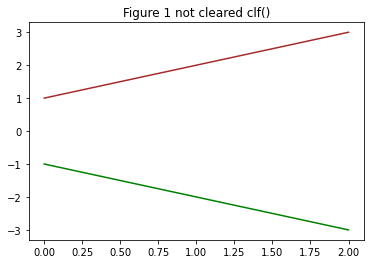

In [33]:
f1 = plt.figure()
plt.plot([1, 2, 3], 'brown', [-1,-2,-3], 'green')
plt.title("Figure 1 not cleared clf()") 
plt.show()

Сменить палитру цветов для 3-хмерного графика можно следующим образом:

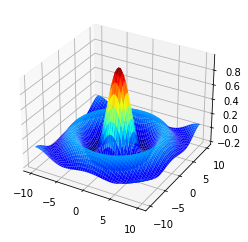

In [34]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap='jet')
plt.show()

Кроме этого есть палитры `hot`, `cool` и многое другое. С ними можете поэкспериментировать сами. Также можете использовать один цвет, тогда, например, вместо cmap='jet' пишите color='green'.

### Plt.fill()

С помощью этой функции, можно закрасить область под кривой.

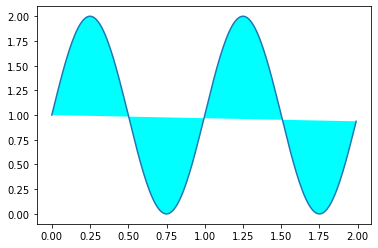

In [35]:
x = np.arange(0.0, 2.0, 0.01)
y = 1 + np.sin(2 * np.pi * x)
plt.plot(x, y)
  
plt.fill(x, y, "cyan")
plt.show()

### Рисование фигур на графиках

Пакет matplotlib позволяет рисовать произвольные фигуры прямо в координатных осях. Это очень удобно, когда нужно добавить нестандартную графическую информацию к отображаемому графику. Давайте посмотрим как это делается.

Для начала рассмотрим создание ломаной линии с помощью класса Line2D:

In [36]:
from matplotlib.lines import Line2D

Объект ломаной создается путем передачи списка координат по x и y конструктору этого класса:

In [37]:
l1 = Line2D([1, 2, 3], [1, 2, 3])

Затем, вызвать метод add_line() и прописать граничные значения, чтобы линия была видна в поле рисования графика:

[(0.0, 4.0), (0.0, 4.0)]

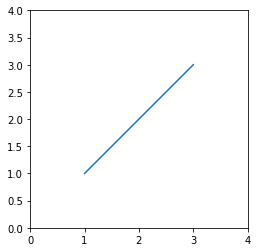

In [38]:
fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
ax.add_line(l1)
ax.set(xlim=[0, 4], ylim=[0, 4])

Классы других стандартных геометрических фигур находятся в модуле:

In [39]:
from matplotlib.patches import *

Полный список классов можно посмотреть в официальной документации:

https://matplotlib.org/stable/api/patches_api.html

Например, можно нарисовать эллипс с помощью класса `Ellipse`:

In [40]:
el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)

Здесь мы в начале указываем координаты расположения фигуры, а затем, ее ширину и высоту. Далее, с помощью параметра `facecolor` делаем заливку зеленого цвета.

[(-20.0, 20.0), (-20.0, 20.0)]

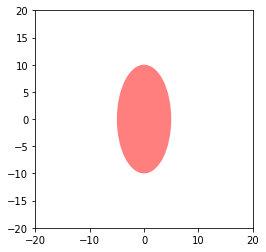

In [41]:

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
ax.add_artist(el)
ax.set(xlim=[-20, 20], ylim=[-20, 20])


Построим тот же эллипс, но добавим к нему стрелку:

[(-20.0, 20.0), (-20.0, 20.0)]

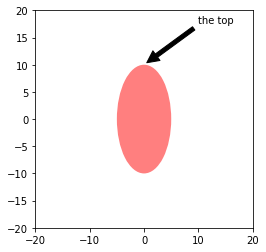

In [42]:
el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
ax.add_artist(el)
el.set_clip_box(ax.bbox)
ax.annotate('the top',
            xy=(np.pi/2., 10.),      # theta, radius
            xytext=(np.pi/3, 20.),   # theta, radius
            xycoords='polar',
            textcoords='polar',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax.set(xlim=[-20, 20], ylim=[-20, 20])

Аналогично можно использовать любой другой класс модуля matplotlib.patches. 

### Анимированные графики

Пакет `matplotlib` славен не только `pyplot`. Например, с помощью `matplotlib.animation` можно делать анимированные графики... Впрочем, не только графики: интерактивную анимацию в целом!

Казалось бы, вот пустой серый фон... Но что будет дальше?

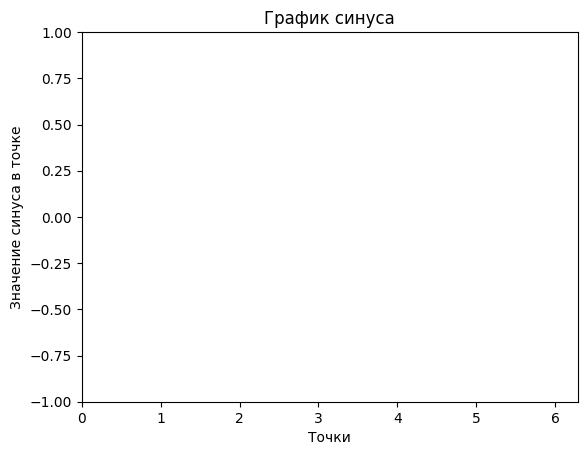

In [3]:
points = np.linspace(0, 2 * np.pi)
values = np.sin(points)

fig, ax = plt.subplots()
ax.axis([0, 2 * np.pi, -1, 1])
(cur_plot,) = ax.plot([], [])
ax.set_xlabel("Точки")
ax.set_ylabel("Значение синуса в точке")
ax.set_title("График синуса");

Далее анимируем, сохраняем в файл.

In [4]:
def animate(iter):
    """Отвечает за анимацию."""
    cur_plot.set_data(points[:iter], values[:iter])


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(points))
with open("animation_example.html", "w") as f:
    f.write(ani.to_jshtml())

In [ ]:
Смотрим, что получилось.

---

При подготовке использованы материалы https://inp.nsk.su/~grozin/python/